In [1]:
import torch
from PIL import Image
import numpy as np
from torchvision.transforms.functional import normalize
import matplotlib.pyplot as plt
from models.unet import UNet
import cv2


Using cache found in C:\Users\Steven/.cache\torch\hub\milesial_Pytorch-UNet_master
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 256, 256])


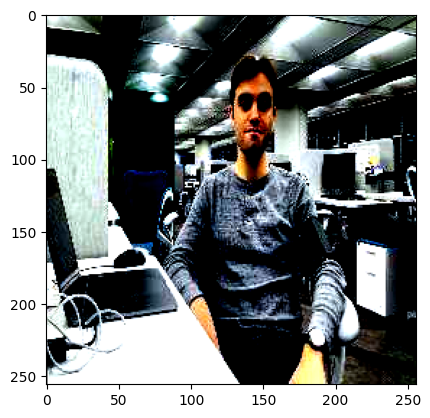

In [11]:
device = torch.device("cpu")
#model = UNet(3, 1)
model = torch.hub.load(
    "milesial/Pytorch-UNet",
    "unet_carvana",
    pretrained=True,
    scale=1,
)
model.load_state_dict(torch.load("./output/unet.pth")["model"])
model = model.to(device)
model.eval()

#image = np.asarray(Image.open(r"./original/Photo on 2023-10-19 at 6.18 PM.jpg"), dtype=np.float32)
image = np.asarray(Image.open(r"./original/Photo on 2023-10-19 at 6.18 PM.jpg").convert("RGB"), dtype=np.float32)

image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_CUBIC) / 255

image = image.transpose((2, 0, 1))

image = torch.from_numpy(image).to(device)

image = normalize(image, mean=(0.5687, 0.5434, 0.5152), std=(0.2508, 0.2399, 0.2307))

plt.imshow(image.permute(1, 2, 0).cpu().numpy())
print(image.shape)

image = torch.unsqueeze(image , 0)

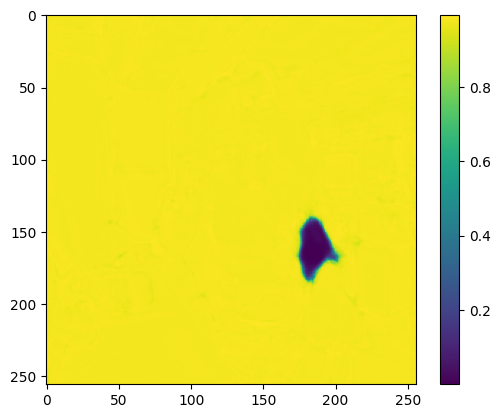

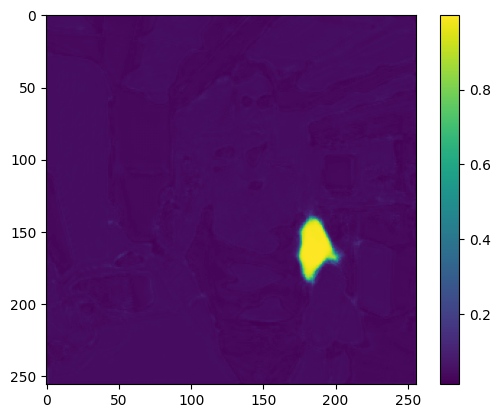

In [12]:
output = model(image)

output_1 = np.transpose(np.squeeze(torch.sigmoid(output.detach()).cpu().numpy(), 0), (1, 2, 0))[:, :, 0]
output_2 = np.transpose(np.squeeze(torch.sigmoid(output.detach()).cpu().numpy(), 0), (1, 2, 0))[:, :, 1]
plt.imshow(output_1)
plt.colorbar()
plt.figure()
plt.imshow(output_2)
plt.colorbar()